In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# For housing data

## Preprocessing the data

In [100]:
df=pd.read_csv("Housing.csv")

In [101]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [102]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [103]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### Mapping the values

Here the columns like mainroad , fuestroom,basement,hotwaterheating , airconditionling , prefarea need binary mapping and furnishingsttus needs ternary mapping 

In [104]:
binary_map={'yes':1,'no':0}
ternary_map={'furnished':2,'semi-furnished':1,'unfurnished':0}

col=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for c in col:
    df[c]=df[c].map(binary_map)

df['furnishingstatus']=df['furnishingstatus'].map(ternary_map)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


### Handling missing values

In [105]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

there is not any missing vvalues for the housing dataset.

### Removing the skewness if any

In [106]:
def removew_skewness(df):
    col=['area','price']
    skewed_cols = df[col].skew().abs()
    skewed_cols = skewed_cols[skewed_cols > 0.75].index.tolist()

    for col in skewed_cols:
        df[col] = np.log1p(df[col]) 

    return df

### Normalizing the data

In [107]:
def min_max(df):
    return (df-df.min())/(df.max()-df.min())

def std_scaling(df):
    return (df-df.mean())/df.std()
    

#### testing if normlization works


In [108]:
df_minmax=df.copy()
cols=float_columns=['price','area']

for c in cols:
    df_minmax[c]=min_max(df[c])

df_minmax.head()  

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,2
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,2
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,1
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,2
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,2


In [109]:
df_std=df.copy()

for c in cols:
    df_std[c]=std_scaling(df[c])

df_std.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.562174,1.045766,4,2,3,1,0,0,0,1,2,1,2
1,4.000809,1.755397,4,4,4,1,0,0,0,1,3,0,2
2,4.000809,2.216196,3,2,2,1,0,1,0,0,2,1,1
3,3.982096,1.082630,4,2,2,1,0,1,0,1,3,1,2
4,3.551716,1.045766,4,1,2,1,1,1,0,1,2,0,2


### Detecting and removing the outliers

In [110]:

def outlier(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(col < lower_bound) | (col > upper_bound)]
    return outliers

outliers_price = outlier(df['price']).describe()
outliers_area = outlier(df['area'])

print("Outliers in Price:" )
outliers_price

print("Outliers in area:")
outliers_area

Outliers in Price:
Outliers in area:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,2
56,7343000,11440,4,1,2,1,0,1,0,0,1,1,1
64,7000000,11175,3,1,1,1,0,1,0,1,1,1,2
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,2
69,6790000,12090,4,2,2,1,0,0,0,0,2,1,2
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,1
129,5873000,11460,3,1,3,1,0,0,0,0,2,1,1
186,5110000,11410,2,1,2,1,0,0,0,0,0,1,2
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,1


In [111]:
def remove_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within bounds
    df_clean = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df_clean


## Model for the pre processed data

### Models

In [112]:
def batch_gradient_descent(X, y, alpha=0.1, epochs=100):
    n_samples = X.shape[0]
    w = np.zeros((X.shape[1], 1))
    loss_history = []

    for epoch in range(epochs):
        y_pred = X @ w
        error = y_pred - y
        loss = (1 / (2 * n_samples)) * np.sum(error ** 2)
        loss_history.append(loss)

        gradient = (1 / n_samples) * (X.T @ error)
        w -= alpha * gradient

    return w, loss_history

In [113]:
def regression_metrics(y_true, y_pred):
    
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()
    
    # Mean Squared Error
    mse = np.mean((y_true - y_pred) ** 2)
    
    # R² score
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_total)
    
    return r2, mse


### Helping functions

In [114]:
def plot_loss_curves(loss_dict, title="Loss over Iterations", xlabel="Iteration", ylabel="Loss"):
    plt.figure(figsize=(10, 6))
    
    for model_name, data in loss_dict.items():
        if isinstance(data, tuple) and len(data) == 2:
            x_values, losses = data
        else:
            x_values = range(1, len(data) + 1)
            losses = data
        
        plt.plot(x_values, losses, label=model_name)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

In [115]:
def predict(w, x):
    w = np.array(w)
    x = np.array(x)
    return np.dot(x, w)

In [ ]:
def plot_predictions_all_separate(X, y, w_dict, title_prefix="Predicted vs Actual"):
   
    n_models = len(w_dict)
    cols = 2  # plots per row
    rows = math.ceil(n_models / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))
    axes = axes.flatten()
    
    y_min, y_max = y.min(), y.max()
    
    for idx, (label, w) in enumerate(w_dict.items()):
        y_pred = X @ w
        ax = axes[idx]
        
        # Scatter plot
        sns.scatterplot(
            x=y.flatten(),
            y=y_pred.flatten(),
            alpha=0.7,
            color='teal',
            ax=ax
        )
        
        # Perfect fit line
        ax.plot([y_min, y_max], [y_min, y_max],'', label='x = y')
        
        ax.set_xlabel("Actual Sales")
        ax.set_ylabel("Predicted Sales")
        ax.set_title(f"{title_prefix} - {label}")
        ax.grid(True)
        ax.legend()
    
    # Remove unused subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_w(x,w):
    w=w.flatten()

    w_df=pd.Dataframe({'feature':x.columns,'Weight':w,'Abs_weight':abs(w)}).sort_values(by='Abs_weight',ascending=True)
    plt.Figure(figsize=(8,5))
    x_pos=np.arrange(len(w_df))
    plt.bar(x_pos,w_df['Abs_weight'],width=0.5)
    plt.xticks(x_pos,w_df['feacture'],rotation=45,ha='right')

    plt.xlabel('Feactures')
    plt.ylabel('Abs weight')
    plt.title('Feacture importance')
    plt.tight_layout()
    plt.show()
    

### Running model with differnt conditions

In [117]:
df_copy=df.copy()

results = {}
loss={}
w={}
r2={}
mse={}
name=['Without preprocessing','with mainmax scaling ','with std scaling','with minmax scaling and removing outlier','with std scaling and removing outlier']

In [118]:
df_copy=df.copy()
df_copy=min_max(df_copy)

w["with mainmax scaling"],results['with mainmax scaling']=batch_gradient_descent(df_copy.drop(columns=['price']).values, df_copy['price'].values.reshape(-1, 1), alpha=0.01, epochs=1000)
r2['with mainmax scaling'], mse['with mainmax scaling'] = regression_metrics(df_copy['price'].values, predict(w["with mainmax scaling"], df_copy.drop(columns=['price']).values))

In [119]:
df_copy=df.copy()

df_copy=std_scaling(df_copy)

w["with std scaling"],results['with std scaling']=batch_gradient_descent(df_copy.drop(columns=['price']).values, df_copy['price'].values.reshape(-1, 1), alpha=0.01, epochs=1000)
r2['with std scaling'], mse['with std scaling'] = regression_metrics(df_copy['price'].values, predict(w["with std scaling"], df_copy.drop(columns=['price']).values))

In [120]:
df_copy=df.copy()
df_copy=std_scaling(df_copy)

df_copy=remove_outliers(df_copy, 'price')
df_copy=remove_outliers(df_copy, 'area')
w["with std scaling and removing outlier"],results['with std scaling and removing outlier']=batch_gradient_descent(df_copy.drop(columns=['price']).values, df_copy['price'].values.reshape(-1, 1), alpha=0.01, epochs=1000)
r2['with std scaling and removing outlier'], mse['with std scaling and removing outlier'] = regression_metrics(df_copy['price'].values, predict(w["with std scaling and removing outlier"], df_copy.drop(columns=['price']).values))

In [121]:
df_copy=df.copy()

df_copy=remove_outliers(df_copy, 'price')
df_copy=remove_outliers(df_copy, 'area')
df_copy=min_max(df_copy)

w["with minmax scaling and removing outlier"],results['with minmax scaling and removing outlier']=batch_gradient_descent(df_copy.drop(columns=['price']).values, df_copy['price'].values.reshape(-1, 1), alpha=0.01, epochs=1000)
r2['with minmax scaling and removing outlier'], mse['with minmax scaling and removing outlier'] = regression_metrics(df_copy['price'].values, predict(w["with minmax scaling and removing outlier"], df_copy.drop(columns=['price']).values))

In [122]:
df_copy=df.copy()

df_copy=remove_outliers(df_copy, 'price')
df_copy=remove_outliers(df_copy, 'area')
df_copy=min_max(df_copy)
df_copy=removew_skewness(df_copy)

w["with minmax scaling and removing outlier and skewness"],results['with minmax scaling and removing outlier and skewness']=batch_gradient_descent(df_copy.drop(columns=['price']).values, df_copy['price'].values.reshape(-1, 1), alpha=0.01, epochs=1000)
r2['with minmax scaling and removing outlier and skewness'], mse['with std minmax and removing outlier and skewness'] = regression_metrics(df_copy['price'].values, predict(w["with std scaling and removing outlier"], df_copy.drop(columns=['price']).values))

In [123]:
df_copy=df.copy()

df_copy=remove_outliers(df_copy, 'price')
df_copy=remove_outliers(df_copy, 'area')
df_copy=std_scaling(df_copy)
df_copy=removew_skewness(df_copy)

w["with std scaling and removing outlier and skewness"],results['with std scaling and removing outlier and skewness']=batch_gradient_descent(df_copy.drop(columns=['price']).values, df_copy['price'].values.reshape(-1, 1), alpha=0.01, epochs=1000)
r2['with std scaling and removing outlier and skewness'], mse['with std scaling and removing outlier and skewness'] = regression_metrics(df_copy['price'].values, predict(w["with std scaling and removing outlier"], df_copy.drop(columns=['price']).values))

In [124]:
df_copy=df.copy()

df_copy=min_max(df_copy)
df_copy=removew_skewness(df_copy)

w["with minmax scaling and removing skewness"],results['with minmax scaling and removing skewness']=batch_gradient_descent(df_copy.drop(columns=['price']).values, df_copy['price'].values.reshape(-1, 1), alpha=0.01, epochs=1000)
r2['with minmax scaling and removing skewness'], mse['with minmax and removing skewness'] = regression_metrics(df_copy['price'].values, predict(w["with std scaling and removing outlier"], df_copy.drop(columns=['price']).values))

In [125]:
key = "with std scaling and removing skewness"

df_copy=df.copy()

df_copy=std_scaling(df_copy)
df_copy=removew_skewness(df_copy)

w["with std scaling and removing skewness"],results['with std scaling and removing skewness']=batch_gradient_descent(df_copy.drop(columns=['price']).values, df_copy['price'].values.reshape(-1, 1), alpha=0.01, epochs=1000)
r2['with std scaling and removing skewness'], mse['with std scaling and removing skewness'] = regression_metrics(df_copy['price'].values, predict(w["with std scaling and removing outlier"], df_copy.drop(columns=['price']).values))


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


### comparing

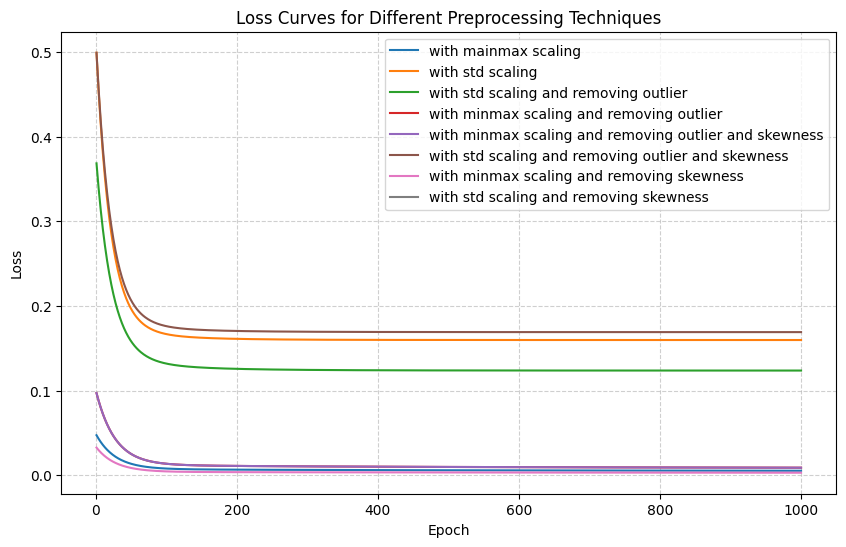

In [126]:
plot_loss_curves(results, title="Loss Curves for Different Preprocessing Techniques", xlabel="Epoch", ylabel="Loss")

In [127]:
print("R² scores:", r2)
print("Mean Squared Errors:", mse)

R² scores: {'with mainmax scaling': np.float64(0.6000387542045139), 'with std scaling': np.float64(0.6800678973508971), 'with std scaling and removing outlier': np.float64(0.6593017432546823), 'with minmax scaling and removing outlier': np.float64(0.6229494673643372), 'with minmax scaling and removing outlier and skewness': np.float64(0.44993545929512), 'with std scaling and removing outlier and skewness': np.float64(0.6547764649067903), 'with minmax scaling and removing skewness': np.float64(-2.6636903750815857), 'with std scaling and removing skewness': np.float64(nan)}
Mean Squared Errors: {'with mainmax scaling': np.float64(0.010469928740651165), 'with std scaling': np.float64(0.31934507126809536), 'with std scaling and removing outlier': np.float64(0.24721133410259633), 'with minmax scaling and removing outlier': np.float64(0.017717838217501357), 'with std minmax and removing outlier and skewness': np.float64(0.025847873687558465), 'with std scaling and removing outlier and skewne

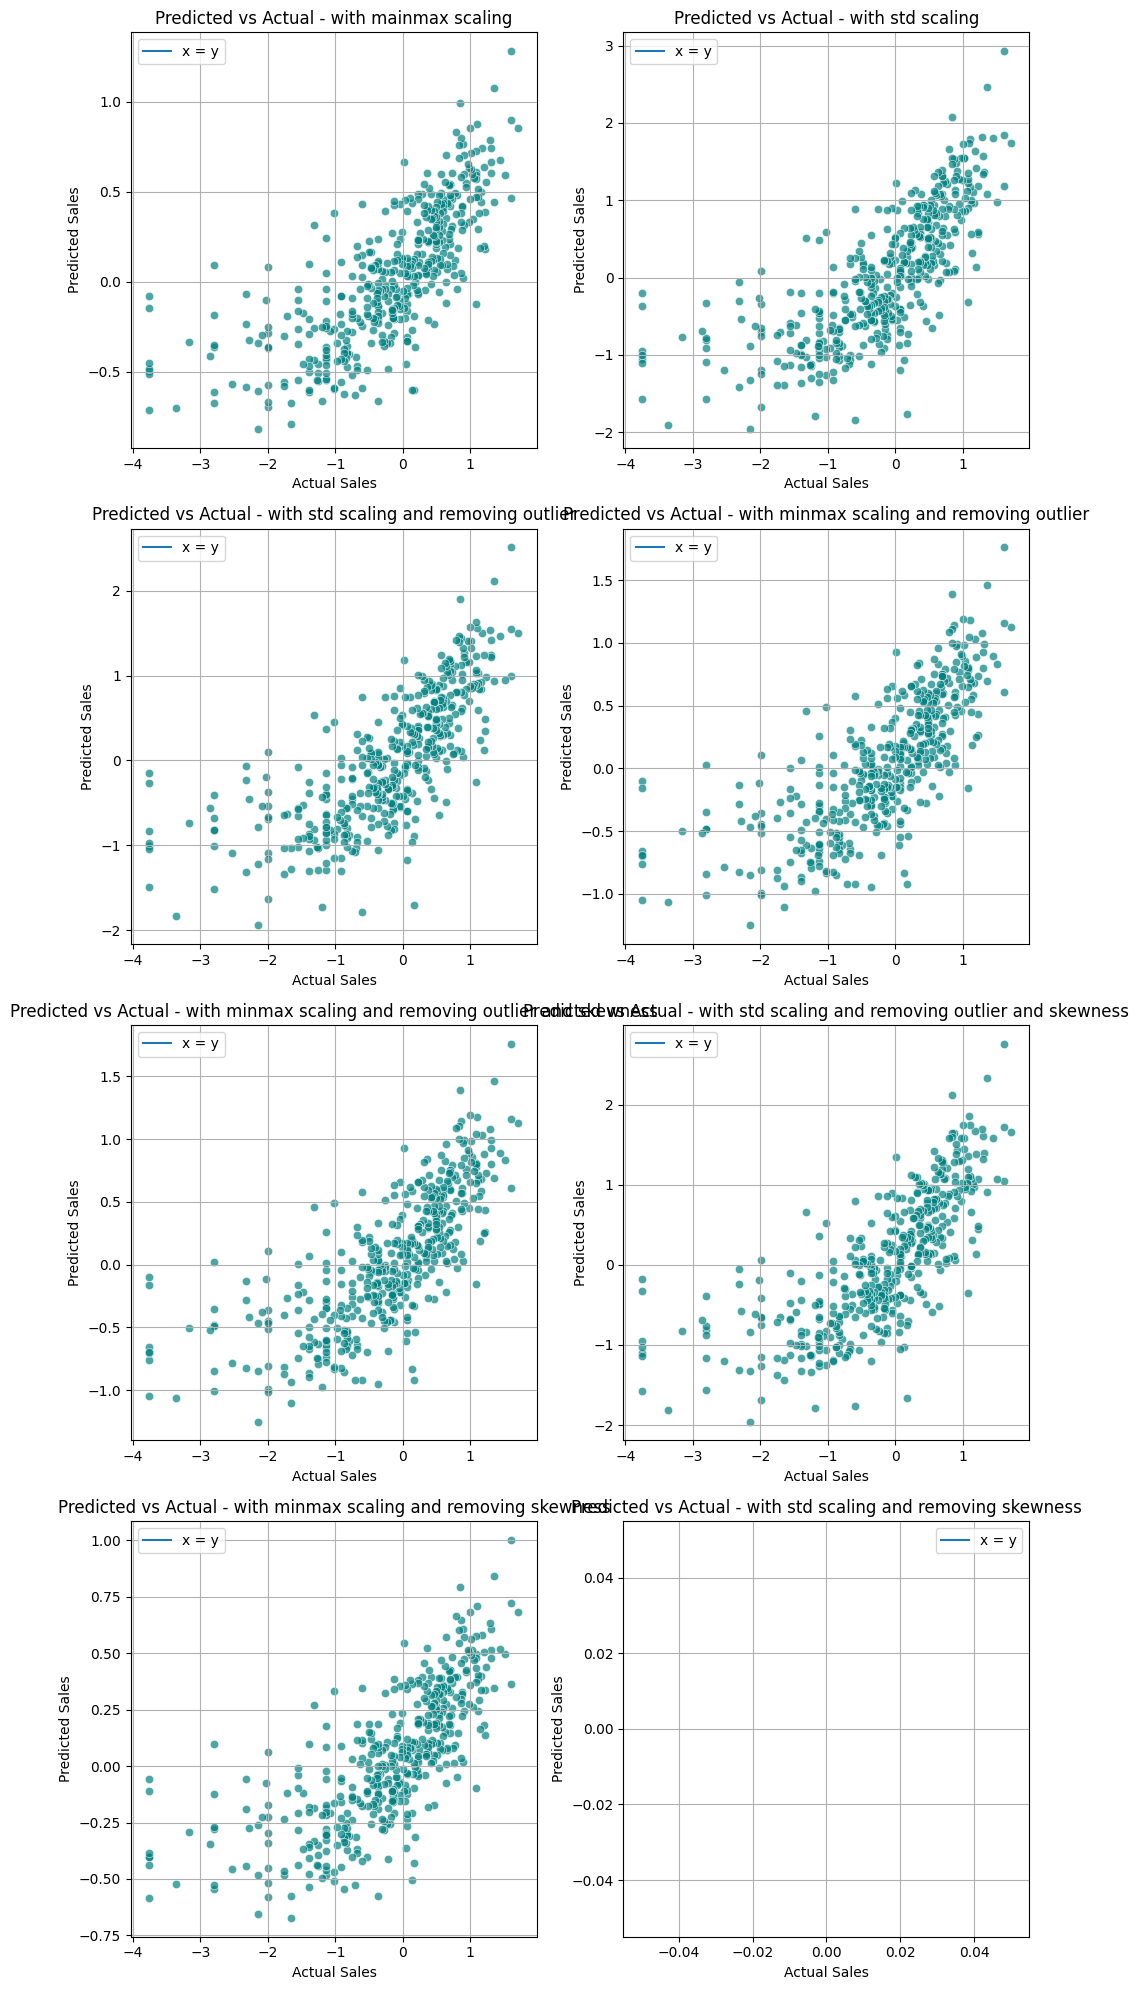

In [134]:
plot_predictions_all_separate(df_copy.drop(columns=['price']).values,df_copy['price'].values,w)